# EDA

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 8)})

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [45]:
# Import dataset
df = pd.read_csv(r'dataset\DailyDelhiClimateTrain.csv')
test = pd.read_csv(r'dataset\DailyDelhiClimateTest.csv')

df.head()
# train.dtypes

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [55]:
# Check for any missing dates - None found
# From 2013-01-01    to    2017-01-01
# Only one observation in 2017, thus the last observation is removed.

# df.groupby(pd.PeriodIndex(df['date'], freq="M")).size()

In [56]:
# I would like to look at monthly averages. 
train = df[:-1].groupby(pd.PeriodIndex(df[:-1]['date'], freq="M")).mean();

# Plot
Let us begin by exploring our variables. 

In [106]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,48.000000,48.000000,48.000000,48.000000
mean,25.479518,60.716376,6.811726,1011.070112
std,7.041301,13.801322,1.987602,34.390560
min,12.074770,28.938249,2.117500,934.847045
25%,18.972184,54.025685,5.423095,1000.542880
50%,28.030655,62.615731,7.260034,1008.816926
75%,31.188816,70.944592,8.541639,1015.501382
max,34.946836,84.572581,10.111250,1227.166990


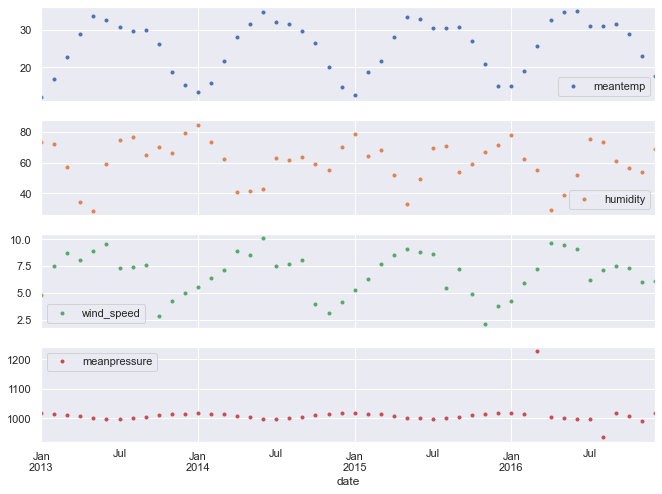

In [91]:
cols_plot = ['meanTemp', 'humidity', 'wind_speed', 'meanpressure']
train.plot(linestyle='None', alpha=1, marker='.', subplots = True);

### Remarks
* Seasionality within meantemp, humidity and wind_speed. 
* Outlier in meanpreassure. Potential outliers in wind_speed.

## Investigating variables

### 1. Mean temperature

### Heat map
Returning the daily values for a second, we can take a quick look into the daily mean temperature with a heat map. As seen in figure below, most of the warmer days reside in the middle of the year.

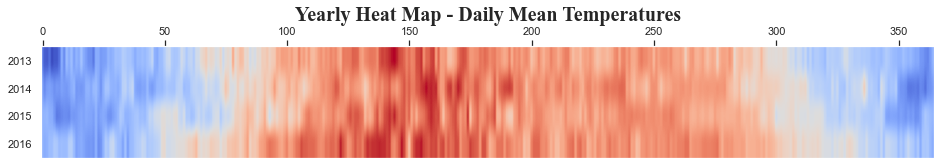

In [199]:
groups = df[:-1].groupby(pd.PeriodIndex(df[:-1]['date'], freq="A"))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.reset_index().meantemp
axs = plt.matshow(years.T, aspect='auto', interpolation=None, cmap=plt.get_cmap('coolwarm'));
plt.grid()
plt.title('Yearly Heat Map - Daily Mean Temperatures', fontname="Times New Roman", size=20, fontweight="bold")
plt.tick_params(axis='x', bottom=False)
plt.yticks(np.arange(4), ["2013", "2014", "2015", "2016"]);

### Line plot
We have already seen a scatter plot of the monthly mean temperature, but let us plot our observations again and investigate. 

**Observations from the line plot:**
* Strong seasonal pattern.
* Potential trend.
* Non-stationary.

In [201]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01,12.074770,73.028802,4.833913,1017.847734
2013-02,16.867560,71.938563,7.474090,1015.946003
2013-03,22.814209,57.417243,8.757270,1011.733909
2013-04,28.895119,34.612103,8.046385,1006.292341
2013-05,33.776767,28.938249,8.943452,999.924194


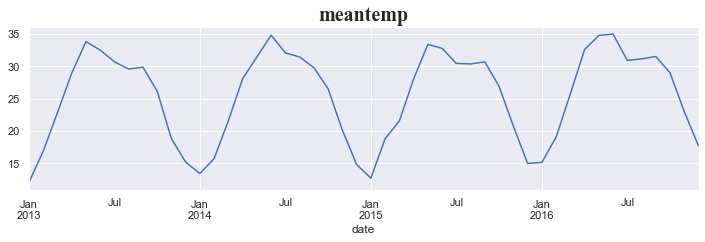

In [114]:
axs = train.loc[:, "meantemp"].plot(figsize=(12, 3));
axs.set_title('meantemp', fontname="Times New Roman", size=20, fontweight="bold");

### Box-and-whisker plot
**Observations:**
* Strong seasonality.
* Potential outliers or structural breaks.

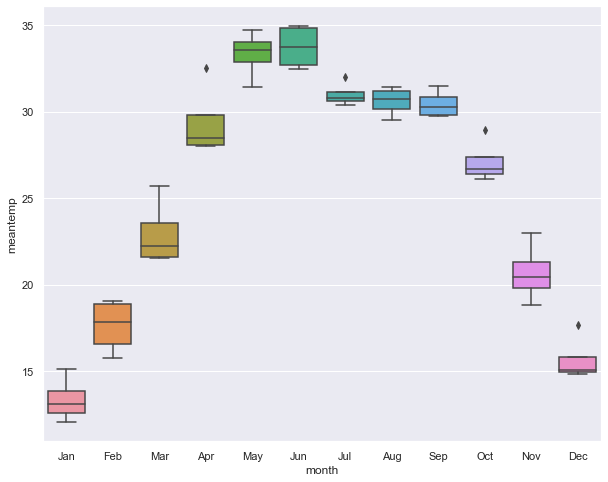

In [217]:
train['month'] = train.index.strftime('%b')
sns.boxplot(x='month', y='meantemp', data=train);

### Density plot
Density of our observations could provide knowledge regarding structure. 

**Observations from the KDE plot:**
* The distribution is not Gaussian.
* Distribution is right shifted, may be exponential or double Gaussian.

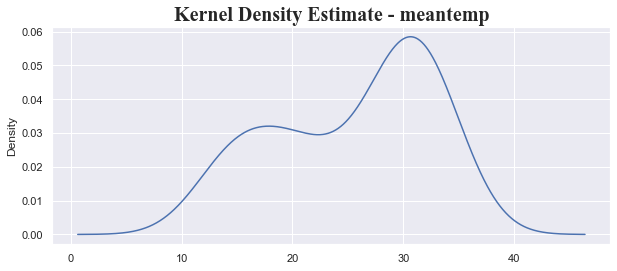

In [104]:
axs = train.loc[:, "meantemp"].plot(kind='kde', figsize=(10, 4))
axs.set_title('Kernel Density Estimate - meantemp', fontname="Times New Roman", size=20, fontweight="bold");

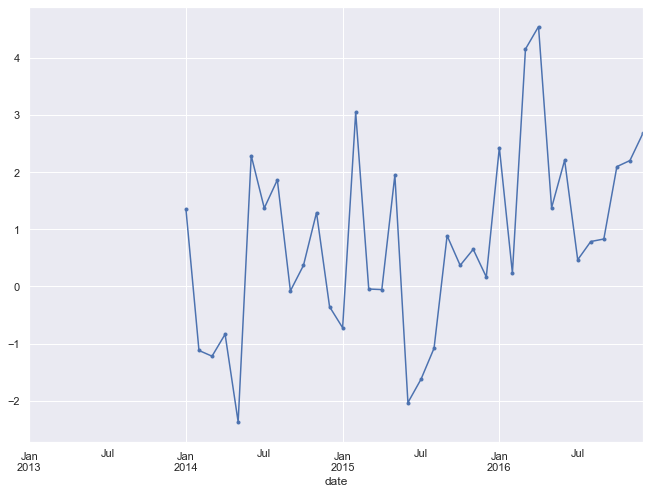

In [77]:
meantemp_d = train.loc[:, "meantemp"].diff(periods=12)

sns.set(rc={'figure.figsize':(11, 8)})
axes = meantemp_d.plot( marker='.', subplots = True)

C:\Users\andre\venv\ts_env\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '


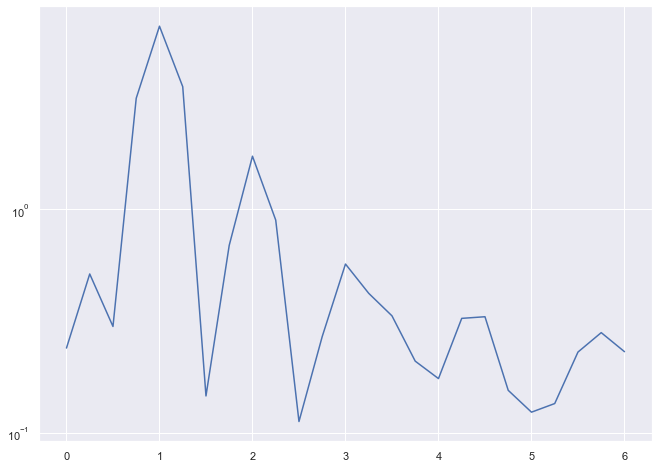

In [80]:
from scipy.signal import periodogram
f, Pxx_spec = signal.welch(train.loc[:, "meantemp"], fs=12, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))

# BREAK POINT?!?